In [6]:
import os
import uuid
import numpy as np 
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# This is used in order to show the plotted figures within this notebook
%matplotlib inline 
# This is used in order to show the tensorboard within this notebook             
#%load_ext tensorboard  
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter

In [7]:
accounts = pd.read_csv('data/account.csv', sep=';')
cards_dev = pd.read_csv('data/card_dev.csv', sep=';')
clients = pd.read_csv('data/client.csv', sep=';')
disp = pd.read_csv('data/disp.csv', sep=';')
districts = pd.read_csv('data/district.csv', sep=';')
loans_dev = pd.read_csv('data/loan_dev.csv', sep=';')
trans_dev = pd.read_csv('data/trans_dev.csv', sep=';')

C:\Users\up201905348\AppData\Local\Temp\ipykernel_16308\1239521831.py:7: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans_dev = pd.read_csv('data/trans_dev.csv', sep=';')


In [8]:
accounts.head()

# categorize/encode frequency, no order
# parse date
# join on acc_id and distr_id

,account_id,district_id,frequency,date
0,576,55,monthly issuance,930101
1,3818,74,monthly issuance,930101
2,704,55,monthly issuance,930101
3,2378,16,monthly issuance,930101
4,2632,24,monthly issuance,930102


<AxesSubplot: >

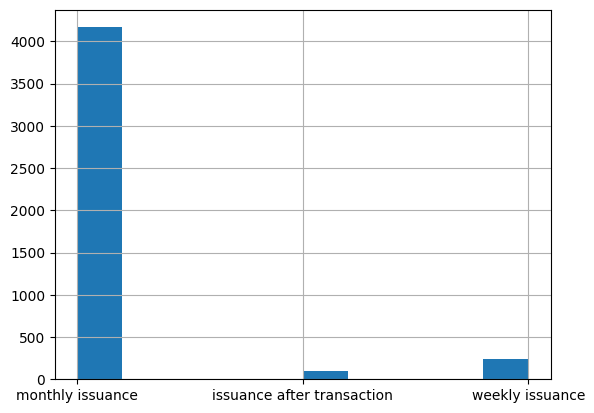

In [9]:
accounts['frequency'].hist()

In [10]:
cards_dev.head()

# encode type, ordered
# parse issued

,card_id,disp_id,type,issued
0,1005,9285,classic,931107
1,104,588,classic,940119
2,747,4915,classic,940205
3,70,439,classic,940208
4,577,3687,classic,940215


<AxesSubplot: >

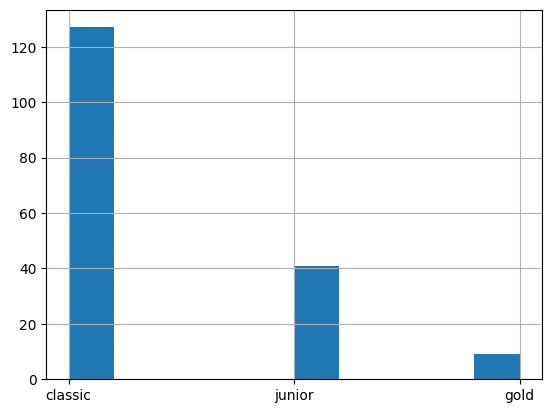

In [11]:
cards_dev['type'].hist()

In [12]:
clients.head()

# parse birth date
# retrieve sex from birth_number

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [13]:
disp.head()

# encode type

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


<AxesSubplot: >

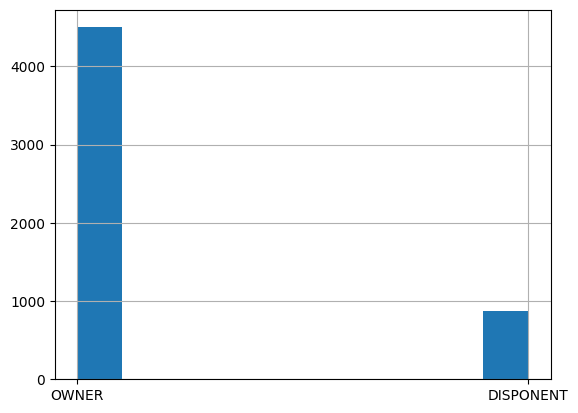

In [14]:
disp['type'].hist()

In [19]:
districts.head(50)
# encode name, region
# normalize no municipalities, no cities, conver to 0-1 scale urban inhabitants, no entrepreneurs
# add crimes per capita

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
5,6,Kutna Hora,central Bohemia,77963,60,23,4,2,4,51.5,8546,2.95,4.02,126,2640,3120
6,7,Melnik,central Bohemia,94725,38,28,1,3,6,63.4,9920,2.26,2.87,130,4289,4846
7,8,Mlada Boleslav,central Bohemia,112065,95,19,7,1,8,69.4,11277,1.25,1.44,127,5179,4987
8,9,Nymburk,central Bohemia,81344,61,23,4,2,6,55.3,8899,3.39,3.97,149,2987,2487
9,10,Praha - vychod,central Bohemia,92084,55,29,4,3,5,46.7,10124,0.56,0.54,141,3810,4316


In [16]:
districts['region'].unique()

array(['Prague', 'central Bohemia', 'south Bohemia', 'west Bohemia',
       'north Bohemia', 'east Bohemia', 'south Moravia', 'north Moravia'],
      dtype=object)

<AxesSubplot: xlabel='region', ylabel='Count'>

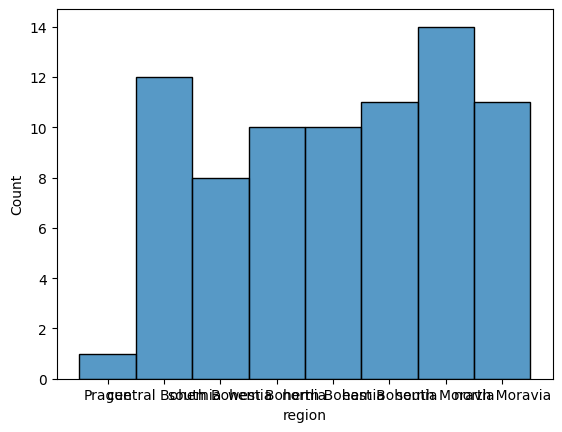

In [18]:
sns.histplot(districts, x='region')

In [13]:
loans_dev.head()

# parse date
# binarize status
# encode duration by year (is by month atm)
# normalize amount

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,-1
1,5316,1801,930711,165960,36,4610,1
2,6863,9188,930728,127080,60,2118,1
3,5325,1843,930803,105804,36,2939,1
4,7240,11013,930906,274740,60,4579,1


In [91]:
trans_dev.head()

# parse date
# encode type, operation, bank
# handle nones on k_symbol and bank

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1548749,5270,930113,credit,credit in cash,800.0,800.0,NaN,NaN,NaN
1,1548750,5270,930114,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0
2,3393738,11265,930114,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN
3,3122924,10364,930117,credit,credit in cash,1100.0,1100.0,NaN,NaN,NaN
4,1121963,3834,930119,credit,credit in cash,700.0,700.0,NaN,NaN,NaN


In [27]:
trans_dev['operation'].unique()

array(['credit in cash', 'collection from another bank', nan,
       'withdrawal in cash', 'remittance to another bank',
       'credit card withdrawal'], dtype=object)

In [28]:
trans_dev['k_symbol'].unique()

array([nan, 'interest credited', ' ', 'household',
       'payment for statement', 'insurrance payment',
       'sanction interest if negative balance', 'old-age pension'],
      dtype=object)

C:\Users\up201906272\AppData\Local\Temp\ipykernel_14952\4034593464.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = districts.corr()


<AxesSubplot: >

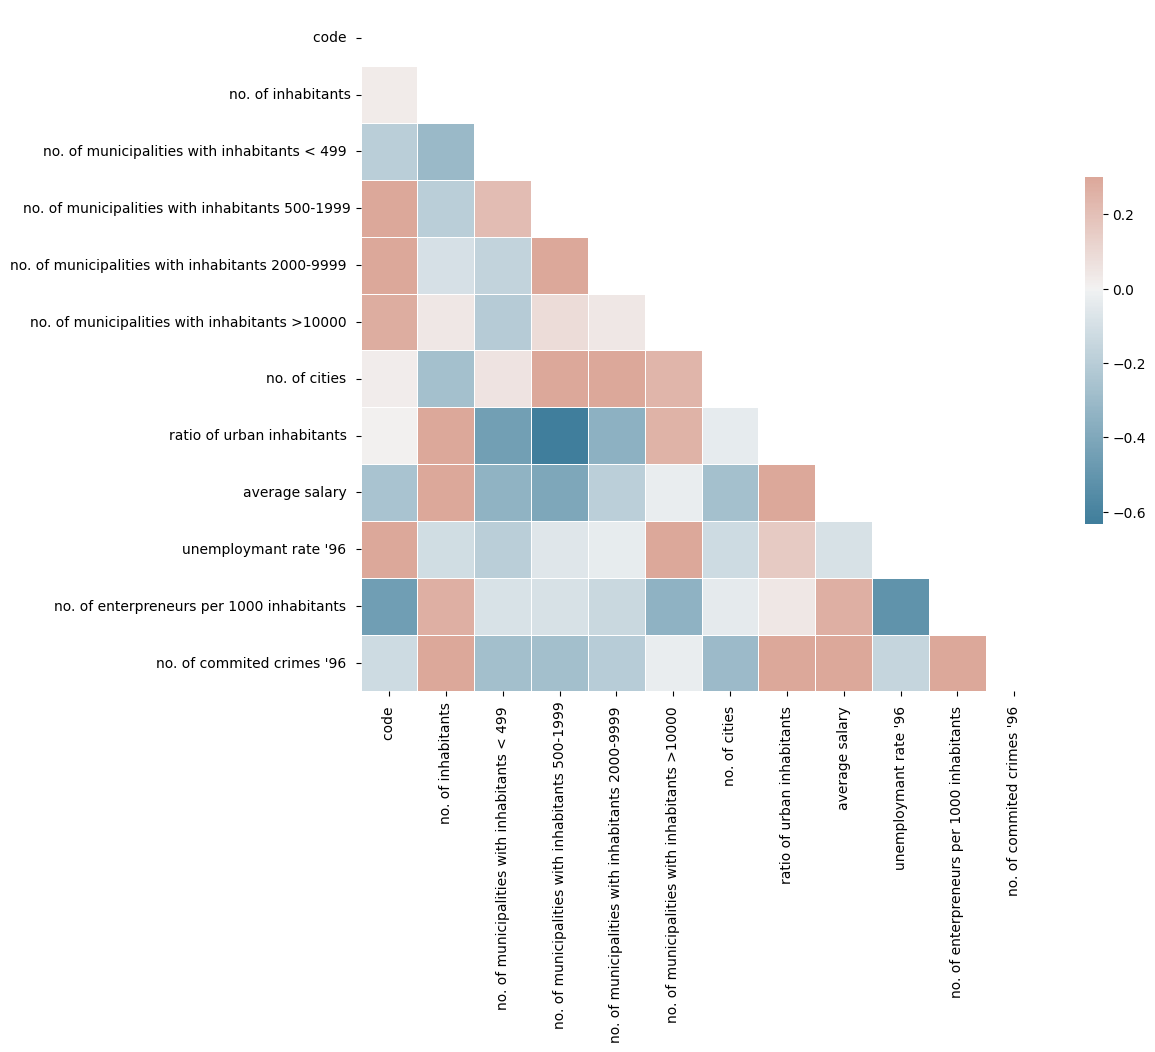

In [19]:
# Compute the correlation matrix
corr = districts.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot: >

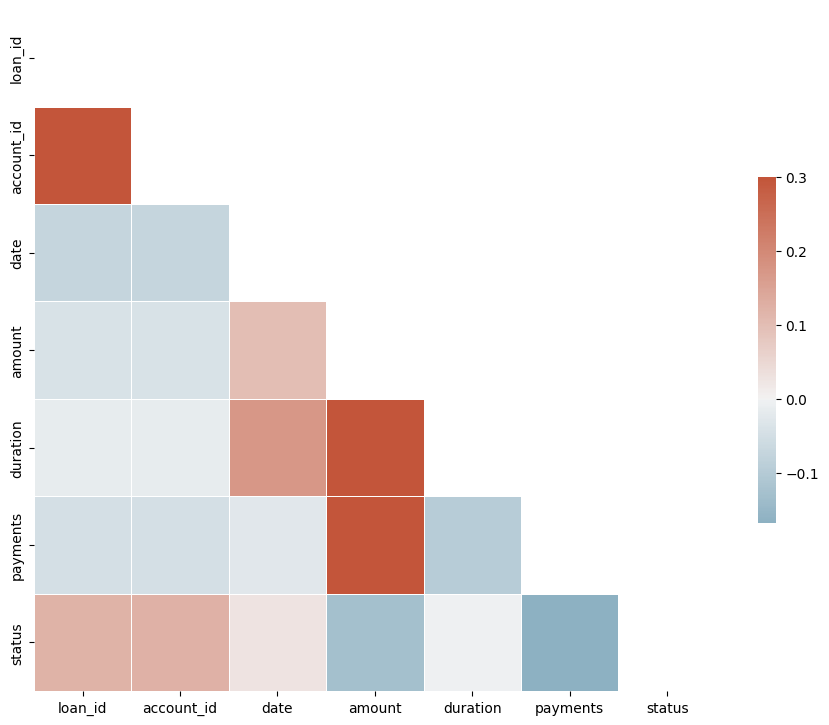

In [20]:
# Compute the correlation matrix
corr = loans_dev.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\Users\up201906272\AppData\Local\Temp\ipykernel_14952\2085598474.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = trans_dev.corr()


<AxesSubplot: >

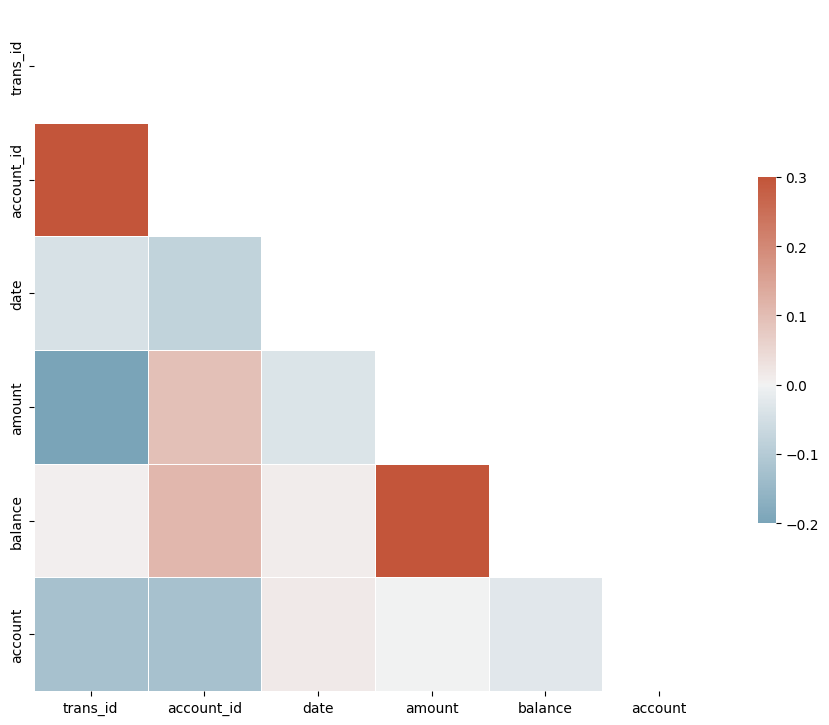

In [21]:
# Compute the correlation matrix
corr = trans_dev.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
merged_df = pd.merge(loans_dev, accounts, left_on='account_id', right_on='account_id')
merged_df = pd.merge(merged_df, districts, left_on='district_id', right_on='code ')

# encode frequency of merged_df using LabelEncoder
feat_enc2 = LabelEncoder()
merged_df['frequency'] = feat_enc2.fit_transform(merged_df['frequency'])

# encode name of merged_df using LabelEncoder
feat_enc3 = LabelEncoder()
merged_df['name '] = feat_enc3.fit_transform(merged_df['name '])

# encode region of merged_df using LabelEncoder
feat_enc4 = LabelEncoder()
merged_df['region'] = feat_enc4.fit_transform(merged_df['region'])

merged_df = merged_df.replace('?', np.nan)
merged_df.dropna(inplace=True)
merged_df['status'].replace(1, 0, inplace=True)
merged_df['status'].replace(-1, 1, inplace=True)

merged_df.count()


loan_id                                              325
account_id                                           325
date_x                                               325
amount                                               325
duration                                             325
payments                                             325
status                                               325
district_id                                          325
frequency                                            325
date_y                                               325
code                                                 325
name                                                 325
region                                               325
no. of inhabitants                                   325
no. of municipalities with inhabitants < 499         325
no. of municipalities with inhabitants 500-1999      325
no. of municipalities with inhabitants 2000-9999     325
no. of municipalities with inha

In [ ]:
sns.set_theme(style="ticks")

sns.pairplot(merged_df, hue="species")

In [93]:
from math import ceil
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

# These columns will be used as the inputs of the models
input_cols = merged_df.columns

# remove 'status' from the inputs
input_cols = input_cols.drop('status')

# The output columns are the genres
output_col = 'status'

# Averages to calculate for precision, recall, and f1-score
averages = [None, "macro", "weighted", "micro", "samples"]

In [94]:
def evaluate_model(model, testing_inputs, testing_classes, output_cols, sample_weight=None):
    """
    This helper function prints the report and evaluation metrics for the model.
    """
    predictions = model.predict(testing_inputs)

    print("="*70)
    print(f"Evaluation metrics for {model.__class__.__name__}")
    print("="*70)

    score = model.score(testing_inputs, testing_classes) 
    print(f"{model.__class__.__name__}'s default score metric: {score}")


    print("Classification report")
    print(
        classification_report(testing_classes, predictions, sample_weight=sample_weight, digits=4, zero_division=1)
    )

    accuracy = accuracy_score(testing_classes, predictions, sample_weight=sample_weight)
    print(f"Accuracy: {accuracy:.4f}")

    f1 = f1_score(testing_classes, predictions, sample_weight=sample_weight, average='weighted')
    print(f"F1-Score: {f1:.4f}")

    cm = confusion_matrix(testing_classes, predictions, sample_weight=sample_weight)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()
    print("="*70)

In [95]:
def train_and_evaluate(input_cols, output_cols, model, params, n_iter=None, sample_weight=None, random_state=42, scoring='accuracy', tuning=True):
    """
    This function trains the model and prints the evaluation metrics, as well as the confusion matrices, and learning and scalability plots.
    """
    inputs = merged_df[input_cols].values
    classes = merged_df[output_cols].values
    
    """scaler = StandardScaler()
    X_train = scaler.fit_transform(train_preprocessed_df[input_cols])
    X_test = scaler.fit_transform(test_preprocessed_df[output_cols])
    oversample = SMOTETomek(random_state=random_state)
    inputs, classes = oversample.fit_resample(inputs, classes)
    counter = Counter(classes)
    plt.bar(counter.keys(), counter.values())
    plt.show()"""
    

    
    (training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(inputs, classes, test_size=0.2, random_state=random_state)
    if tuning:
        if n_iter == None:
            clf = GridSearchCV(model, params, n_jobs=-1, cv=5)
        else:
            clf = RandomizedSearchCV(
                model, params, n_iter=n_iter, scoring=scoring,
                n_jobs=-1, cv=5, random_state=random_state)
    else:
        clf = model
    
    clf.fit(training_inputs, training_classes)

    if tuning:
        print(f"Best params for {model.__class__.__name__}: {clf.best_params_}")
        
    evaluate_model(clf, testing_inputs, testing_classes, output_cols, sample_weight=sample_weight)
    
    return clf

In [104]:
def use_model(model, params = {}, scoring='accuracy', n_iter=None, random_state=42, tuning=True):
    """
    A more convenient wrapper around train_and_evaluate, albeit less general.
    """
    return train_and_evaluate(input_cols, output_col, model, params, n_iter=n_iter, random_state=random_state, scoring=scoring, tuning=tuning)

In [97]:
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

level0 = list()
level0.append(('lr', LogisticRegression() ))
level0.append(('rf', DecisionTreeClassifier()))
level0.append(('xgb', XGBClassifier()))
level0.append(('lgbm', LGBMClassifier()))

level1 = CatBoostClassifier()
clf = StackingClassifier(estimators=level0, final_estimator=level1, cv=4)

C:\Users\up201906272\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\up201906272\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\up201906272\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACH

Learning rate set to 0.005796
0:	learn: 0.6884004	total: 1.61ms	remaining: 1.61s
1:	learn: 0.6840189	total: 2.42ms	remaining: 1.21s
2:	learn: 0.6789109	total: 3.51ms	remaining: 1.17s
3:	learn: 0.6748041	total: 4.17ms	remaining: 1.04s
4:	learn: 0.6706299	total: 4.86ms	remaining: 966ms
5:	learn: 0.6662099	total: 5.94ms	remaining: 985ms
6:	learn: 0.6619731	total: 7.06ms	remaining: 1s
7:	learn: 0.6578933	total: 8.14ms	remaining: 1.01s
8:	learn: 0.6535538	total: 9.24ms	remaining: 1.02s
9:	learn: 0.6496073	total: 10.3ms	remaining: 1.02s
10:	learn: 0.6456241	total: 11.4ms	remaining: 1.02s
11:	learn: 0.6417654	total: 12.2ms	remaining: 1s
12:	learn: 0.6380851	total: 12.8ms	remaining: 973ms
13:	learn: 0.6344083	total: 13.7ms	remaining: 966ms
14:	learn: 0.6302234	total: 14.8ms	remaining: 971ms
15:	learn: 0.6266273	total: 16ms	remaining: 986ms
16:	learn: 0.6228192	total: 17.2ms	remaining: 993ms
17:	learn: 0.6194484	total: 18.3ms	remaining: 998ms
18:	learn: 0.6160054	total: 19.4ms	remaining: 1s
19:

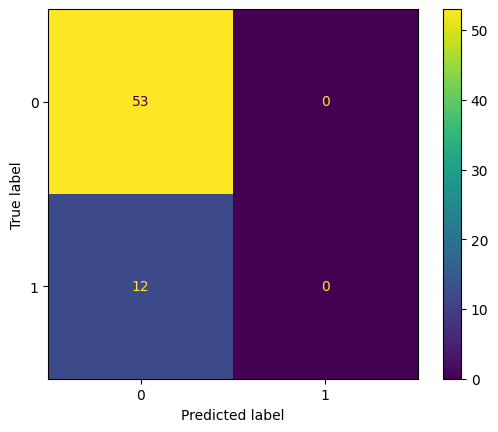

RandomizedSearchCV(cv=5,
                   estimator=StackingClassifier(cv=4,
                                                estimators=[('lr',
                                                             LogisticRegression()),
                                                            ('rf',
                                                             DecisionTreeClassifier()),
                                                            ('xgb',
                                                             XGBClassifier(base_score=None,
                                                                           booster=None,
                                                                           callbacks=None,
                                                                           colsample_bylevel=None,
                                                                           colsample_bynode=None,
                                                                           colsample_bytree=None,
                                                                           early_stopping_rounds=None,
                                                                           enable_categorical=False,
                                                                           eval_metric=None,
                                                                           gamma=None,
                                                                           gpu_id=N...
                                                                           min_child_weight=None,
                                                                           missing=nan,
                                                                           monotone_constraints=None,
                                                                           n_estimators=100,
                                                                           n_jobs=None,
                                                                           num_parallel_tree=None,
                                                                           predictor=None,
                                                                           random_state=None,
                                                                           reg_alpha=None,
                                                                           reg_lambda=None, ...)),
                                                            ('lgbm',
                                                             LGBMClassifier())],
                                                final_estimator=<catboost.core.CatBoostClassifier object at 0x000001CE5CCE65F0>),
                   n_iter=50, n_jobs=-1, param_distributions={},
                   random_state=42, scoring='accuracy')

In [98]:
use_model(
    clf
)

Best params for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 4}
Evaluation metrics for GridSearchCV
GridSearchCV's default score metric: 0.8153846153846154
Classification report
              precision    recall  f1-score   support

           0     0.8154    1.0000    0.8983        53
           1     1.0000    0.0000    0.0000        12

    accuracy                         0.8154        65
   macro avg     0.9077    0.5000    0.4492        65
weighted avg     0.8495    0.8154    0.7325        65

Accuracy: 0.8154
F1-Score: 0.7325


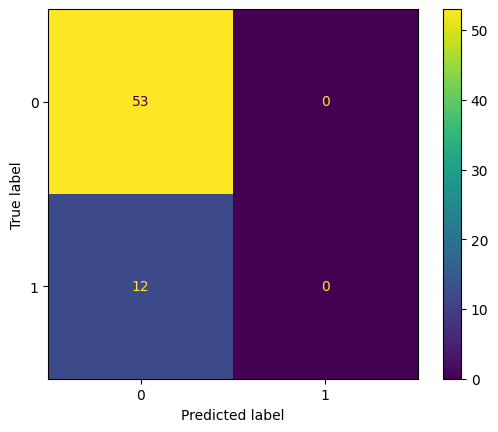

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [107]:
use_model(
    DecisionTreeClassifier(),
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],	
        'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'max_features': ['auto', 'sqrt', 'log2', None]
    },
    scoring='recall',
)